In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import split_folders
from PIL import Image

In [5]:
cat_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\input\\Cat'
dog_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\input\\Dog'

In [6]:
no_of_images = 1
for filename in os.listdir(cat_dir):
    filepath = os.path.join(cat_dir, filename)
    try:
        with Image.open(filepath) as im:
            if(no_of_images > 2000):
                os.remove(filepath)
            no_of_images = no_of_images + 1
    except:
        os.remove(filepath)

In [7]:
no_of_images = 1
for filename in os.listdir(dog_dir):
    filepath = os.path.join(dog_dir, filename)
    try:
        with Image.open(filepath) as im:
            if(no_of_images > 2000):
                os.remove(filepath)
            no_of_images = no_of_images + 1
    except:
        os.remove(filepath)

In [8]:
input = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\input'
split_folders.ratio(input, output='C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output', seed=1337, ratio=(.8, .1, .1)) # default values

Copying files: 4000 files [00:06, 636.92 files/s]


In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [10]:
train_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output\\train'
test_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output\\test'
val_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output\\val'

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 3200 images belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 400 images belonging to 2 classes.


In [13]:
val_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 400 images belonging to 2 classes.


In [14]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

In [15]:
from keras import optimizers
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [16]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 15, validation_data = val_generator, validation_steps = 50)

Epoch 1/15
100/100 [==============================] - 58s 578ms/step - loss: 0.7149 - accuracy: 0.5391 - val_loss: 0.6807 - val_accuracy: 0.5503
Epoch 2/15
100/100 [==============================] - 58s 584ms/step - loss: 0.6696 - accuracy: 0.5994 - val_loss: 0.6089 - val_accuracy: 0.6217
Epoch 3/15
100/100 [==============================] - 56s 558ms/step - loss: 0.6210 - accuracy: 0.6500 - val_loss: 0.5124 - val_accuracy: 0.6706
Epoch 4/15
100/100 [==============================] - 55s 551ms/step - loss: 0.6004 - accuracy: 0.6809 - val_loss: 0.5746 - val_accuracy: 0.6445
Epoch 5/15
100/100 [==============================] - 56s 558ms/step - loss: 0.5682 - accuracy: 0.7109 - val_loss: 0.4840 - val_accuracy: 0.6940
Epoch 6/15
100/100 [==============================] - 56s 561ms/step - loss: 0.5307 - accuracy: 0.7366 - val_loss: 0.6992 - val_accuracy: 0.6823
Epoch 7/15
100/100 [==============================] - 55s 554ms/step - loss: 0.5007 - accuracy: 0.7622 - val_loss: 0.6197 - val_ac

In [17]:
test_loss, test_acc = model.evaluate_generator(test_generator)

In [18]:
print(test_acc)

0.7950000166893005


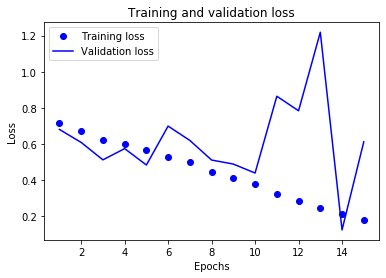

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
train_cat_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output\\train\\Cat'
train_dog_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output\\train\\Dog'

In [21]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')


In [22]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)      

In [23]:
train_datagenerator = ImageDataGenerator(rescale=1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_generator_augment = train_datagenerator.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 3200 images belonging to 2 classes.


In [24]:
from keras import optimizers
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [25]:
history = model.fit_generator(train_generator_augment, steps_per_epoch = 100, epochs = 25, validation_data = val_generator, validation_steps = 50)


Epoch 1/25
100/100 [==============================] - 88s 880ms/step - loss: 0.8209 - accuracy: 0.5050 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/25
100/100 [==============================] - 80s 796ms/step - loss: 0.6951 - accuracy: 0.5359 - val_loss: 0.7454 - val_accuracy: 0.5000
Epoch 3/25
100/100 [==============================] - 79s 788ms/step - loss: 0.6860 - accuracy: 0.5694 - val_loss: 0.6768 - val_accuracy: 0.5358
Epoch 4/25
100/100 [==============================] - 78s 779ms/step - loss: 0.6781 - accuracy: 0.5913 - val_loss: 0.6254 - val_accuracy: 0.6204
Epoch 5/25
100/100 [==============================] - 79s 787ms/step - loss: 0.6657 - accuracy: 0.6266 - val_loss: 0.5428 - val_accuracy: 0.6302
Epoch 6/25
100/100 [==============================] - 78s 784ms/step - loss: 0.6428 - accuracy: 0.6334 - val_loss: 0.5622 - val_accuracy: 0.6230
Epoch 7/25
100/100 [==============================] - 68s 675ms/step - loss: 0.6322 - accuracy: 0.6525 - val_loss: 0.6577 - val_ac

In [26]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print(test_acc)

0.7925000190734863


In [27]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [28]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:\\Users\\divya\\OneDrive\\Desktop\\PetImages\\output'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [29]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
conv_base.trainable = False

In [31]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
from keras import optimizers
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [33]:
history = model.fit_generator(train_generator_augment, steps_per_epoch = 100, epochs = 25, validation_data = val_generator, validation_steps = 50)

Epoch 1/25
100/100 [==============================] - 209s 2s/step - loss: 0.9055 - accuracy: 0.6800 - val_loss: 0.3958 - val_accuracy: 0.8518
Epoch 2/25
100/100 [==============================] - 217s 2s/step - loss: 0.4801 - accuracy: 0.7784 - val_loss: 0.2284 - val_accuracy: 0.8587
Epoch 3/25
100/100 [==============================] - 207s 2s/step - loss: 0.4483 - accuracy: 0.7966 - val_loss: 0.3953 - val_accuracy: 0.8418
Epoch 4/25
100/100 [==============================] - 206s 2s/step - loss: 0.4182 - accuracy: 0.8009 - val_loss: 0.3198 - val_accuracy: 0.8249
Epoch 5/25
100/100 [==============================] - 205s 2s/step - loss: 0.4021 - accuracy: 0.8156 - val_loss: 0.2188 - val_accuracy: 0.8717
Epoch 6/25
100/100 [==============================] - 206s 2s/step - loss: 0.3888 - accuracy: 0.8209 - val_loss: 0.2603 - val_accuracy: 0.8841
Epoch 7/25
100/100 [==============================] - 205s 2s/step - loss: 0.3751 - accuracy: 0.8325 - val_loss: 0.2519 - val_accuracy: 0.8550

In [34]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print(test_acc)

0.9225000143051147


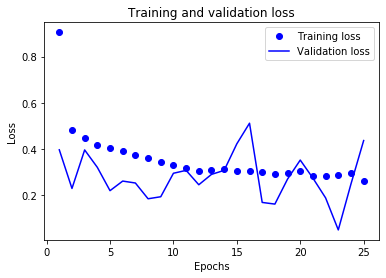

In [35]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [38]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [39]:
from keras import optimizers
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [40]:
history = model.fit_generator(train_generator_augment, steps_per_epoch = 100, epochs = 25, validation_data = val_generator, validation_steps = 50)

Epoch 1/25
100/100 [==============================] - 235s 2s/step - loss: 14.0418 - accuracy: 0.4847 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 2/25
100/100 [==============================] - 240s 2s/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 3/25
100/100 [==============================] - 240s 2s/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6930 - val_accuracy: 0.5046
Epoch 4/25
100/100 [==============================] - 238s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4961
Epoch 5/25
100/100 [==============================] - 239s 2s/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6928 - val_accuracy: 0.5013
Epoch 6/25
100/100 [==============================] - 241s 2s/step - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6936 - val_accuracy: 0.4961
Epoch 7/25
100/100 [==============================] - 243s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.501